<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/Exercises/Classifying_NewsWires_SingleLabel_MultiClass_Classification_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the Reuters data**

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


**Preparing the data** - Vectorizing/Encoding

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
   results = np.zeros((len(sequences), dimension))
   for i, sequence in enumerate(sequences):
       results[i, sequence] = 1.
   return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Preparing the labels** with One-Hot

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
train_labels[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Model definition**

Because we have 46 output classes, we will use 64 units in the intermediate layers.

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

**Compiling the model**

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Validation set**

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

Training the model with **20 epochs**

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 258us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 182us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 186us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0795 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.7033 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.5666 - acc: 0.8800 - val_loss: 0.9413 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.4581 - a

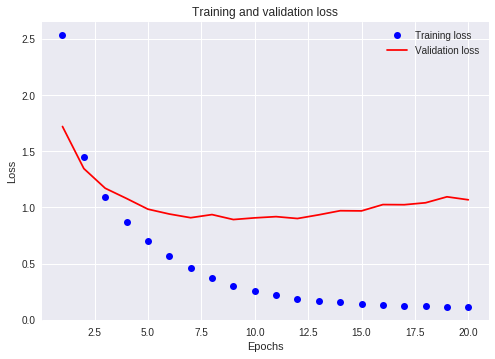

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
predictions = model.predict(x_test)

In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

1.0000001

In [33]:
np.argmax(predictions[0])

3

In [34]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])